In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [126]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

from sklearn.cluster import KMeans

In [127]:
import plotly.express as px

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Dataset Atletas Olímpicos (desde 1968 a 2022)  
#### Proyecto Inteligencia Artificial (IS-701) | Sección 11:00  

**Catedrático:** Ing. Uayeb Caballero.  

*Grupo* <span style="color:#757331">***Cardamomo***</span>  
Integrantes:  
> - Owenn Alexis Chavarría Rivera  
N° ***20161003613***
> - Kenet Francisco Orellana Meza  
N° ***20141011708***
> - Jakmeni Jasiel Quilico Valeriano  
N° ***20161004456***
> - Melvin Elías Cedillo Romero  
N° ***20171005421***

Fuente Dataset: https://www.kaggle.com/datasets/josephcheng123456/olympic-historical-dataset-from-olympediaorg

### Significado de variables dentro del Dataset:  

**OA** = Olympic Athlete 

### Contexto del Dataset: Jugadores Olímpicos
Este conjunto de datos es un intento de crear conjuntos de datos de jugadores olímpicos actualizados (desde los Juegos Olímpicos de 1986 hasta 2022) para que cualquier amante de los deportes y los datos los use para visualizar y crear algunas ideas sobre el conjunto de datos de jugadores (atletas) olímpicos. Este conjunto de datos contiene 154,902 atletas únicos y su información biológica, es decir, altura, peso y fecha de nacimiento.

### Importando el Dataset a Jupiter Notebook:

In [129]:
OA = pd.read_csv("Olympic_Athlete.csv")

In [130]:
OA.head(2)

,Name,ID,Sex,Age,Height,Weight,NOC,Year,Sport
0,Aaron Russell,103595,M,23.0,206.0,93.0,USA,2016,Volleyball
1,Aauri Lorena Bokesa Abia,12909,F,27.0,180.0,62.0,ESP,2016,Athletics


In [131]:
OA.dtypes

Name       object
ID          int64
Sex        object
Age       float64
Height    float64
Weight    float64
NOC        object
Year        int64
Sport      object
dtype: object

### Análisis de valores nulos:

In [132]:
OA.isnull().values.any()

False

In [133]:
OA.isnull().head(5)

,Name,ID,Sex,Age,Height,Weight,NOC,Year,Sport
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


#### Análisis de columnas para comprobar si hay o no valores nulos (NaN):

In [134]:
OA.isnull().any()

Name      False
ID        False
Sex       False
Age       False
Height    False
Weight    False
NOC       False
Year      False
Sport     False
dtype: bool

In [135]:
OA.isnull().sum()

Name      0
ID        0
Sex       0
Age       0
Height    0
Weight    0
NOC       0
Year      0
Sport     0
dtype: int64

#### Funciones de Ventana

In [136]:
OA["NOC"].drop_duplicates()

0     USA
1     ESP
3     ITA
4     RUS
7     MEX
8     POL
9     BRA
25    FRA
29    ARG
47    JAM
Name: NOC, dtype: object

#### Estadísticas descriptivas del Dataset:

In [137]:
OA.shape[0]

2780

In [138]:
OA.describe()

,ID,Age,Height,Weight,Year
count,2780.000000,2780.000000,2780.000000,2780.000000,2780.0
mean,63520.588129,27.343885,178.350360,73.635971,2016.0
std,38918.362722,4.832243,11.423963,15.980462,0.0
min,51.000000,20.000000,146.000000,30.000000,2016.0
25%,27864.750000,24.000000,170.000000,62.000000,2016.0
50%,64474.000000,27.000000,178.000000,71.000000,2016.0
75%,96861.250000,30.000000,186.000000,83.000000,2016.0
max,135489.000000,50.000000,215.000000,160.000000,2016.0


### Análisis de valores atípicos

<AxesSubplot:xlabel='Sex', ylabel='Weight'>

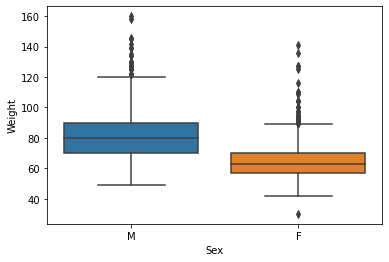

In [139]:
sns.boxplot( data=OA  , x="Sex" , y="Weight" )

### Para visualizar los cambios seleccionaremos 10 países:

In [140]:
men = OA.loc[(OA["Sex"] == "M") , :]

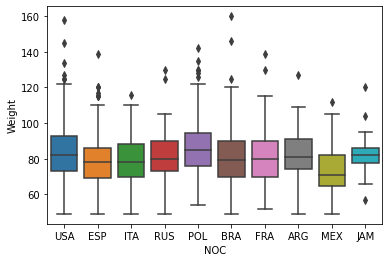

In [141]:
sns.boxplot( data=men  , x="NOC" , y="Weight" )
plt.show()

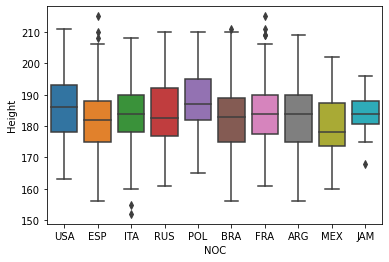

In [142]:
sns.boxplot( data=men  , x="NOC" , y="Height" )
plt.show()

In [143]:
women = OA.loc[(OA["Sex"] == "F") , :]

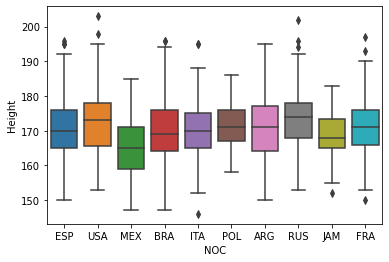

In [144]:
sns.boxplot( data=women  , x="NOC" , y="Height" )
plt.show()

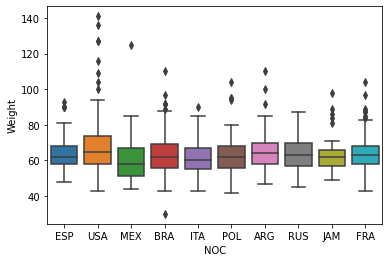

In [145]:
sns.boxplot( data=women  , x="NOC" , y="Weight" )
plt.show()

**NOTA:** Para limpiar los valores atípicos y debido a la diferencia en los rasgos fisicos entre hombre y mujer esta será nuestra categoria primaria. Luego tambien separaremos a los atletas por países ya que también los rasgos físicos de las personas son característicos según su procesencia.

#### Tratando valores atípicos de Weight (peso):  

OAw_qn = Atletas olímpicos peso quartil n

In [146]:
OAw_q1 = OA.loc[: , ["NOC", "Sex", "Weight"]].groupby(["NOC", "Sex"], as_index = False).quantile(0.25)
OAw_q1.columns = ["NOC", "Sex", "weight_q1"]

In [147]:
OAw_q2 = OA.loc[: , ["NOC", "Sex", "Weight"]].groupby(["NOC", "Sex"], as_index = False).quantile(0.5)
OAw_q2.columns = ["NOC", "Sex", "weight_q2"]

In [148]:
OAw_q3 = OA.loc[: , ["NOC", "Sex", "Weight"]].groupby(["NOC", "Sex"], as_index = False).quantile(0.75)
OAw_q3.columns = ["NOC", "Sex", "weight_q3"]

### Haciendo Join y Calculando el Inter Quantile

In [149]:
OAw_iqr = OAw_q1.merge(OAw_q2, on = ["NOC", "Sex"], how = "inner").merge(OAw_q3, on = ["NOC", "Sex"], how = "inner")

In [150]:
OAw_iqr.head(2)

,NOC,Sex,weight_q1,weight_q2,weight_q3
0,ARG,F,58.0,64.0,70.0
1,ARG,M,74.0,81.0,91.0


In [151]:
OAw_iqr["iqr"] = OAw_iqr.apply(lambda q: q["weight_q3"] - q["weight_q1"], axis = 1)

In [152]:
OAw_iqr.head(2)

,NOC,Sex,weight_q1,weight_q2,weight_q3,iqr
0,ARG,F,58.0,64.0,70.0,12.0
1,ARG,M,74.0,81.0,91.0,17.0


In [153]:
OAw_iqr["upper_weight"] = OAw_iqr.apply(lambda q: q["weight_q3"] + 1.5*q["iqr"], axis = 1)
OAw_iqr["lower_weight"] = OAw_iqr.apply(lambda q: q["weight_q1"] - 1.5*q["iqr"], axis = 1)

In [154]:
OAw_iqr.head(2)

,NOC,Sex,weight_q1,weight_q2,weight_q3,iqr,upper_weight,lower_weight
0,ARG,F,58.0,64.0,70.0,12.0,88.0,40.0
1,ARG,M,74.0,81.0,91.0,17.0,116.5,48.5


### Quitando las columnas no utilizadas

In [155]:
OAw_iqr = OAw_iqr.loc[:, ["NOC", "Sex", "upper_weight", "lower_weight", "weight_q2"]]

In [156]:
OAw_iqr.head(2)

,NOC,Sex,upper_weight,lower_weight,weight_q2
0,ARG,F,88.0,40.0,64.0
1,ARG,M,116.5,48.5,81.0


In [157]:
OA_m1 = OA.merge(OAw_iqr, on = ["NOC", "Sex"], how = "left")

In [158]:
OA_m1.head(2)

,Name,ID,Sex,Age,Height,Weight,NOC,Year,Sport,upper_weight,lower_weight,weight_q2
0,Aaron Russell,103595,M,23.0,206.0,93.0,USA,2016,Volleyball,123.0,43.0,82.0
1,Aauri Lorena Bokesa Abia,12909,F,27.0,180.0,62.0,ESP,2016,Athletics,83.0,43.0,62.0


### Función para centrar los valores atípicos

In [159]:
def getRealWeight(r):
    if ((r["Weight"] < r["lower_weight"]) | (r["Weight"] > r["upper_weight"])):
        return r["weight_q2"]
    else:
        return r["Weight"]

In [160]:
OA_m1["Weight"] = OA_m1.apply(lambda r: getRealWeight(r), axis = 1)

### Seleccionando columnas necesarias 

In [161]:
OA_m1 = OA_m1.loc[:, ['Name', 'ID', 'Sex', 'Age', 'Height', 'Weight', 'NOC', 'Sport']]

In [162]:
OA_m1.head(2)

,Name,ID,Sex,Age,Height,Weight,NOC,Sport
0,Aaron Russell,103595,M,23.0,206.0,93.0,USA,Volleyball
1,Aauri Lorena Bokesa Abia,12909,F,27.0,180.0,62.0,ESP,Athletics


#### Tratando valores atípicos de Height (altura):  

OAh_qn = Atletas olímpicos altura quartil n

In [163]:
OAh_q1 = OA.loc[: , ["NOC", "Sex", "Height"]].groupby(["NOC", "Sex"], as_index = False).quantile(0.25)
OAh_q1.columns = ["NOC", "Sex", "height_q1"]

In [164]:
OAh_q2 = OA.loc[: , ["NOC", "Sex", "Height"]].groupby(["NOC", "Sex"], as_index = False).quantile(0.5)
OAh_q2.columns = ["NOC", "Sex", "height_q2"]

In [165]:
OAh_q3 = OA.loc[: , ["NOC", "Sex", "Height"]].groupby(["NOC", "Sex"], as_index = False).quantile(0.75)
OAh_q3.columns = ["NOC", "Sex", "height_q3"]

### Join y Cálculo de Inter Quantile

In [166]:
OAh_iqr = OAh_q1.merge(OAh_q2, on = ["NOC", "Sex"], how = "inner").merge(OAh_q3, on = ["NOC", "Sex"], how = "inner")

In [167]:
OAh_iqr.head(2)

,NOC,Sex,height_q1,height_q2,height_q3
0,ARG,F,164.0,171.0,177.0
1,ARG,M,175.0,184.0,190.0


In [168]:
OAh_iqr["iqr"] = OAh_iqr.apply(lambda q: q["height_q3"] - q["height_q1"], axis = 1)

In [169]:
OAh_iqr.head(2)

,NOC,Sex,height_q1,height_q2,height_q3,iqr
0,ARG,F,164.0,171.0,177.0,13.0
1,ARG,M,175.0,184.0,190.0,15.0


In [170]:
OAh_iqr["upper_height"] = OAh_iqr.apply(lambda q: q["height_q3"] + 1.5*q["iqr"], axis = 1)
OAh_iqr["lower_height"] = OAh_iqr.apply(lambda q: q["height_q1"] - 1.5*q["iqr"], axis = 1)

In [171]:
OAh_iqr.head(2)

,NOC,Sex,height_q1,height_q2,height_q3,iqr,upper_height,lower_height
0,ARG,F,164.0,171.0,177.0,13.0,196.5,144.5
1,ARG,M,175.0,184.0,190.0,15.0,212.5,152.5


### Limpiando columnas

In [172]:
OAh_iqr = OAh_iqr.loc[:, ["NOC", "Sex", "upper_height", "lower_height", "height_q2"]]

In [173]:
OAh_iqr.head(2)

,NOC,Sex,upper_height,lower_height,height_q2
0,ARG,F,196.5,144.5,171.0
1,ARG,M,212.5,152.5,184.0


In [174]:
OA_m2 = OA.merge(OAh_iqr, on = ["NOC", "Sex"], how = "left")

In [175]:
OA_m2.head(2)

,Name,ID,Sex,Age,Height,Weight,NOC,Year,Sport,upper_height,lower_height,height_q2
0,Aaron Russell,103595,M,23.0,206.0,93.0,USA,2016,Volleyball,215.5,155.5,186.0
1,Aauri Lorena Bokesa Abia,12909,F,27.0,180.0,62.0,ESP,2016,Athletics,192.5,148.5,170.0


### Función centrar valores atípicos

In [176]:
def getRealHeight(r):
    if ((r["Height"] < r["lower_height"]) | (r["Height"] > r["upper_height"])):
        return r["height_q2"]
    else:
        return r["Height"]

In [177]:
OA_m2["Height"] = OA_m2.apply(lambda r: getRealHeight(r), axis = 1)

In [178]:
OA_m2 = OA_m2.loc[:, ['Name', 'ID', 'Sex', 'Age', 'Height', 'Weight', 'NOC', 'Year', 'Sport']]

In [179]:
OA_m2.head(2)

,Name,ID,Sex,Age,Height,Weight,NOC,Year,Sport
0,Aaron Russell,103595,M,23.0,206.0,93.0,USA,2016,Volleyball
1,Aauri Lorena Bokesa Abia,12909,F,27.0,180.0,62.0,ESP,2016,Athletics


### Resultado final de análisis de valores atípicos

In [180]:
OA_f = OA_m1.merge(OA_m2, on = ['Name', 'ID', 'Sex', 'Age', 'Height', 'Weight', 'NOC', 'Sport'], how = "left")

## Dataset final

In [181]:
OA_f.head(2)

,Name,ID,Sex,Age,Height,Weight,NOC,Sport,Year
0,Aaron Russell,103595,M,23.0,206.0,93.0,USA,Volleyball,2016.0
1,Aauri Lorena Bokesa Abia,12909,F,27.0,180.0,62.0,ESP,Athletics,2016.0


pruebas

In [182]:
men_f = OA_f.loc[(OA_f["Sex"] == "M") , :]

In [183]:
men_fp = OA_f.loc[(OA_f["Sex"] == "M") & (OA_f["NOC"] == "POL") , ["Height"]]

{'whiskers': [<matplotlib.lines.Line2D at 0x223be833040>,
 'caps': [<matplotlib.lines.Line2D at 0x223be8338b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x223be8331f0>],
 'medians': [<matplotlib.lines.Line2D at 0x223be820910>],
 'fliers': [<matplotlib.lines.Line2D at 0x223be820040>],
 'means': []}

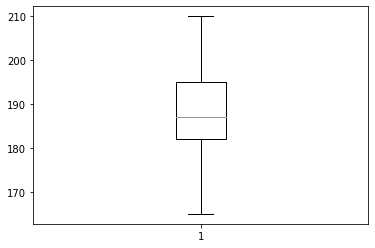

In [184]:
plt.boxplot(men_fp)

<AxesSubplot:xlabel='NOC', ylabel='Weight'>

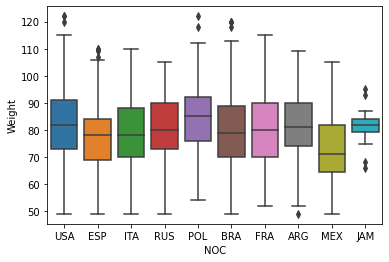

In [185]:
sns.boxplot( data=men_f  , x="NOC" , y="Weight" )

<AxesSubplot:xlabel='NOC', ylabel='Height'>

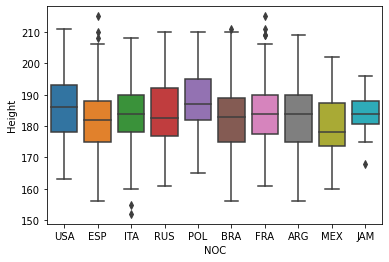

In [186]:
sns.boxplot( data=men_f  , x="NOC" , y="Height" )

In [187]:
woman_f = OA_f.loc[(OA_f["Sex"] == "F") , :]

<AxesSubplot:xlabel='NOC', ylabel='Weight'>

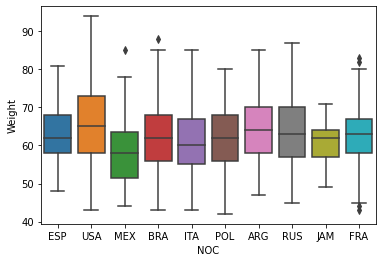

In [188]:
sns.boxplot( data=woman_f  , x="NOC" , y="Weight" )

<AxesSubplot:xlabel='NOC', ylabel='Height'>

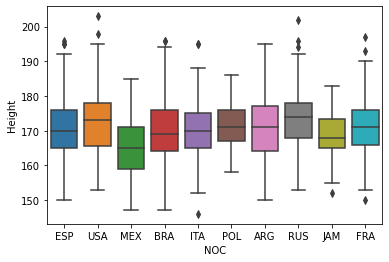

In [189]:
sns.boxplot( data=woman_f  , x="NOC" , y="Height" )

### DATASET Final Sin Valores Atípicos

In [190]:
OA_f.head(5)

,Name,ID,Sex,Age,Height,Weight,NOC,Sport,Year
0,Aaron Russell,103595,M,23.0,206.0,93.0,USA,Volleyball,2016.0
1,Aauri Lorena Bokesa Abia,12909,F,27.0,180.0,62.0,ESP,Athletics,2016.0
2,Abdel Aziz Merzougui Noureddine,78998,M,24.0,175.0,67.0,ESP,Athletics,2016.0
3,Abdoullah Bamoussa,7439,M,30.0,170.0,59.0,ITA,Athletics,2016.0
4,Abdul-Rashid Bulayevich Sadulayev,104166,M,20.0,177.0,86.0,RUS,Wrestling,2016.0


## ML NO SUPERVISADO

### Correlaciones

Tomamos los valores numéricos.

In [191]:
OA_n = OA_f.loc[:, ["Weight", "Height", "Age"]].copy()

In [192]:
OA_n.head(5)

,Weight,Height,Age
0,93.0,206.0,23.0
1,62.0,180.0,27.0
2,67.0,175.0,24.0
3,59.0,170.0,30.0
4,86.0,177.0,20.0


Se hará uso de **height** = altura y **weight** = peso

**Contexto**: Para el cuerpo humano es de sentido común asumir que la altura de la persona es proporcional para su peso. Esto para el caso en el que la persona no sufra sobre peso, y en atletas olímpicos esto es prácticamente imposible ya que ellos cuidan de su cuerpo para desempeñarse de la mejor manera.

In [193]:
x = OA_n["Weight"]
y = OA_n["Height"]

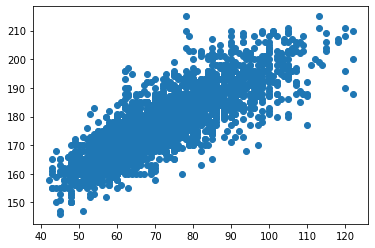

In [194]:
plt.scatter(x,y)
plt.show()

In [195]:
x = OA_n["Weight"]
y = OA_n["Weight"]

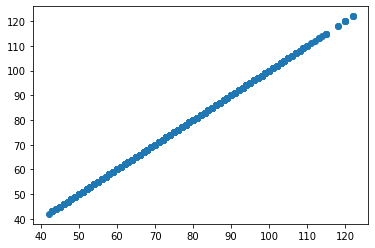

In [196]:
plt.scatter(x,y)
plt.show()

In [197]:
x = OA_n["Height"]
y = OA_n["Height"]

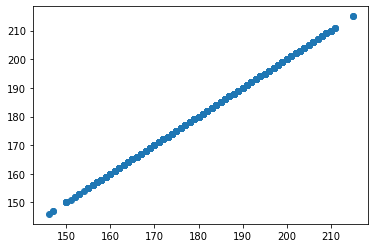

In [198]:
plt.scatter(x,y)
plt.show()

#### Consideraciones a tomar en cuenta dentro de una Correlación

Siendo **R** el coeficiente de correlación:  

> - Si **R** = 1 las variables tienen una correlación positiva perfecta.  
> - Si **R** = 0 no hay relación lineal entre las variables.  
> - Si **R** = -1 las variables están perfectamente correlacionadas de forma negativa o inversa.  

In [199]:
OA_n.corr()

,Weight,Height,Age
Weight,1.000000,0.821203,0.073029
Height,0.821203,1.000000,0.042970
Age,0.073029,0.042970,1.000000


In [200]:
O = OA_n.corr()

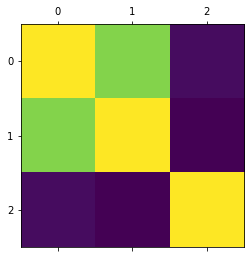

In [201]:
plt.matshow(O)
plt.show()

In [202]:
O

,Weight,Height,Age
Weight,1.000000,0.821203,0.073029
Height,0.821203,1.000000,0.042970
Age,0.073029,0.042970,1.000000


### PCA y K-Means - Implementación

**Contexto:** K-means es un algoritmo de clasificación no supervisada (clusterización) que agrupa objetos en k grupos basándose en sus características. El agrupamiento se realiza minimizando la suma de distancias entre cada objeto y el centroide de su grupo o cluster.

Usaremos las columnas numéricas **Height** (Altura), **Weight** (Peso) y **Age** (Edad) para el análisis.

In [203]:
columnas_usadas = ["Height", "Weight", "Age"]

In [204]:
colms = OA_f.loc[:, columnas_usadas].values

In [205]:
colms

array([[206.,  93.,  23.],
       [180.,  62.,  27.],
       [175.,  67.,  24.],
       ...,
       [190.,  86.,  34.],
       [194.,  76.,  27.],
       [178.,  73.,  27.]])

In [206]:
colms = StandardScaler().fit_transform(colms)

In [207]:
colms 

array([[ 2.42075495,  1.41321723, -0.89909928],
       [ 0.14442773, -0.73450811, -0.07117745],
       [-0.2933275 , -0.3881008 , -0.69211882],
       ...,
       [ 1.0199382 ,  0.92824699,  1.37768575],
       [ 1.37014239,  0.23543237, -0.07117745],
       [-0.03067436,  0.02758798, -0.07117745]])

In [208]:
pca = PCA(n_components = 2) 

In [209]:
principalesComponentes = pca.fit_transform(colms)

In [210]:
dfpca = pd.DataFrame(data=principalesComponentes, columns=["C0", "C1"])

### Procedemos a Graficar la Matriz Resultante

In [211]:
x = dfpca["C0"]
y = dfpca["C1"]

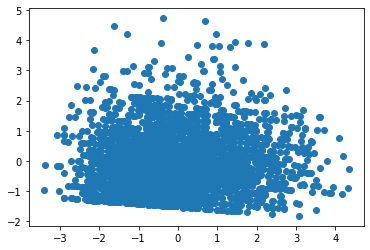

In [212]:
plt.scatter(x,y)
plt.show()

> - Se puede observar que todos intentan converger a un mismo centro.

In [213]:
km = KMeans(n_clusters=2).fit(dfpca)

In [214]:
km.cluster_centers_

array([[ 1.28421036e+00,  4.63819252e-06],
       [-9.56910041e-01, -3.45607942e-06]])

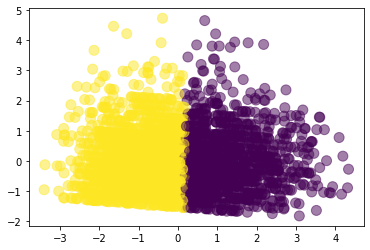

In [215]:
plt.scatter(dfpca["C0"], dfpca["C1"], c=km.labels_.astype(float), s= 100, alpha= 0.5)
plt.show()

In [216]:
OA_n["cluster"] = km.labels_

In [217]:
OA_n.head(10)

,Weight,Height,Age,cluster
0,93.0,206.0,23.0,0
1,62.0,180.0,27.0,1
2,67.0,175.0,24.0,1
3,59.0,170.0,30.0,1
4,86.0,177.0,20.0,0
5,50.0,160.0,24.0,1
6,61.0,165.0,26.0,1
7,64.0,169.0,28.0,1
8,81.0,187.0,31.0,0
9,88.0,182.0,26.0,0


In [218]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

In [219]:
fig = px.scatter(principalesComponentes, x=0, y=1, color=OA_n["cluster"])

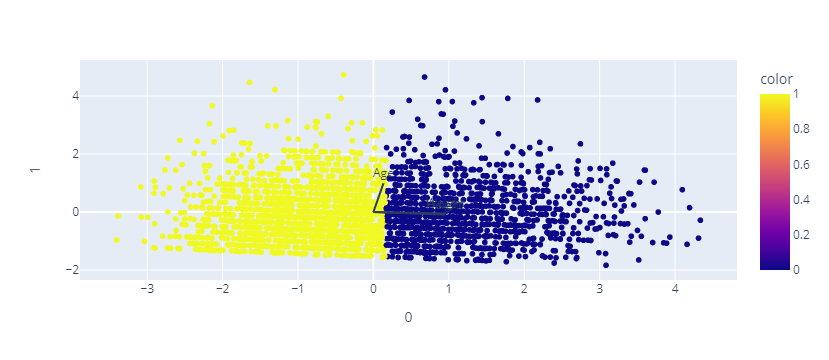

In [220]:
for i, feacture in enumerate(columnas_usadas):
    fig.add_shape(
        type="line",
        x0=0, y0=0,
        x1=loadings[i,0],
        y1=loadings[i,1]
    )
    fig.add_annotation(
        x=loadings[i,0],
        y=loadings[i,1],
        ax=0, ay=0,
        xanchor= "center",
        yanchor="bottom",
        text=feacture,
    )
fig.show()

## ML SUPERVISADO

### Variable de Respuesta

**Contexto:** Una variable de respuesta es un conjunto de datos que se seleccionan para llevar a cabo un estudio, en este caso para efectos de nuestro proyecto la elección de información (data) es en base a la altura, al peso y a la edad de los atletas olímpicos.  

> - Tanto el peso como la altura se ubican dentro de categoría de variables **Cuantitavivas Continuas** ya que se expresan en valores númericos y además que su valor es expresado en decimales ya que el peso y la altura no pueden ser valores exactos.  

> - Así mismo la edad entra dentro de la categoría de variables **Cuantitativas Discretas** porque son valores númericos enteros.  

**NOTA:** Mediante la implementación de ***técnicas de validación cruzada*** se desea predecir un peso para el atleta mediante los datos proporcionados en el dataset, previamente se analizó y realizó el tratamiento de los datos. Se utilizaron 2 maneras para predecir este dato, el primero utilizando la regresión lineal mediante la altura del atleta y en el segundo caso se utilizó una regresión multiple entre la altura y la edad de cada atleta.

### Técnica de Validación Cruzada:  
> - Training Testing  

In [247]:
OA_n.head()

,Weight,Height,Age,cluster
0,93.0,206.0,23.0,0
1,62.0,180.0,27.0,1
2,67.0,175.0,24.0,1
3,59.0,170.0,30.0,1
4,86.0,177.0,20.0,0


**x** = Variable dependiente  
**y** = Variable independiente  

In [248]:
y = OA_n.loc[ : , "Height" ].values
x = OA_n.loc[ : , ["Weight"] ].values

In [254]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split( x, y, test_size=.50, random_state=0 )

**NOTA:** test_size debe ser = 50 para que el X_Test y Y_Train resulte

In [255]:
np.mean(y)

178.35035971223022

In [256]:
np.mean(Y_Train)

178.19568345323742

In [257]:
np.mean(Y_Test)

178.505035971223

In [258]:
regression = LinearRegression()
regression.fit( X_Train , Y_Train )

LinearRegression()

In [259]:
Y_Test

array([188., 190., 171., ..., 178., 172., 171.])

In [260]:
regression.predict( X_Test )

array([210.17558656, 183.08443451, 173.40902307, ..., 177.27918764,
       174.0540505 , 175.34410536])

### Gráfica de Predicción para X_Test y Y_Test

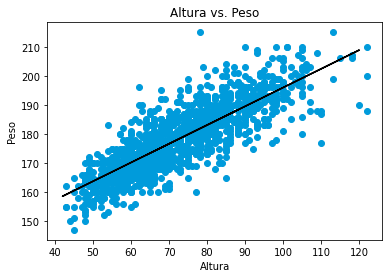

In [261]:
viz_train = plt
viz_train.scatter(X_Test, Y_Test, color = "#009bdb")
viz_train.plot(X_Train,regression.predict(X_Train), color = "#000")
viz_train.title('Altura vs. Peso')
viz_train.xlabel("Altura")
viz_train.ylabel("Peso")
viz_train.show()

### Gráfica de Predicción para X_Test y Y_Train

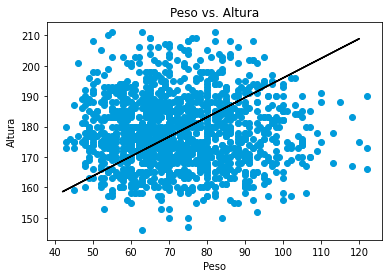

In [231]:
viz_train = plt
viz_train.scatter(X_Test, Y_Train, color = "#009bdb")
viz_train.plot(X_Train,regression.predict(X_Train), color = "#000")
viz_train.title('Peso vs. Altura')
viz_train.xlabel("Peso")
viz_train.ylabel("Altura")
viz_train.show()

In [232]:
regression.coef_[0]*15 + regression.intercept_

141.15765158568854

In [233]:
regression.intercept_

131.48224014124332

In [234]:
regression.coef_[0]

0.6450274296296808

### Resultados del Entrenamiento

##### Peso vs. Edad

#### y = 1.06*x - 25.192444076213437
altura = (1.06)(peso) - 25.192444076213437

In [262]:
regression.coef_[0]*206 + regression.intercept_

264.3578906449576

### Regresión Múltiple 

In [263]:
OA_m = OA_f.loc[:, ["Weight", "Height", "Age"]].copy()

In [264]:
OA_m

,Weight,Height,Age
0,93.0,206.0,23.0
1,62.0,180.0,27.0
2,67.0,175.0,24.0
3,59.0,170.0,30.0
4,86.0,177.0,20.0
...,...,...,...
2775,90.0,190.0,26.0
2776,75.0,184.0,27.0
2777,86.0,190.0,34.0
2778,76.0,194.0,27.0


In [265]:
y = OA_m.loc[ : , "Weight" ].values
x = OA_m.loc[ : , ["Height","Age"] ].values

In [266]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split( x, y, test_size=.50, random_state=0 )

In [267]:
X_Train

array([[173.,  26.],
       [173.,  21.],
       [186.,  28.],
       ...,
       [178.,  41.],
       [161.,  28.],
       [178.,  24.]])

In [268]:
regression = LinearRegression()
regression.fit( X_Train , Y_Train )

LinearRegression()

In [269]:
regression.predict( X_Test )

array([82.89686789, 84.12739988, 65.63699394, ..., 72.16437902,
       66.66860802, 65.49821125])

In [270]:
regression.intercept_

-115.21005968450254

In [271]:
regression.coef_

array([1.03161408, 0.13878269])

### Resultado del Entrenamiento

##### Peso vs. Edad-Altura

#### y = a1x1 + a2x2 + I

In [272]:
regression.score(X_Train , Y_Train )

0.669637387929736

Peso = (1.06)(altura) + (0.13)(edad) - 115.21005968450254

In [246]:
regression.coef_[0]*178 + regression.coef_[1]*27 + regression.intercept_

72.1643790193661